In [1]:
# importing Libraaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

# 1 eur = $1.08377483
EUR = 1.08
# 1 rupee = $0.01364522
RUPEE = 0.014
# 1 pound = $0.8499
POUND = 0.85
# 1 Indonesian Rupee = $0.000070
INDONESIAN_RUPEE = 0.000070

def trim_values(x):

    if isinstance(x, str) and len(x.strip()) == 0:
        return np.nan
    else:
        if isinstance(x, str):
            return x.strip() 
        else:
            return x
        
def remove_non_words(val, symb):
    val =  re.sub(r'[^\x00-\x7f]',r'',val)
    val = val.replace('C',"")
    val = val.replace('�','')
    val = val.replace('_','')
    return val.replace(symb, '')
        
def make_price_numeric(price):
    #print(price)
    if 'nan' == (str(price)):
        return price

    if price.startswith('â'):
        price = remove_non_words(price, '')
        return float(price)*RUPEE
        
    if price.startswith( 'About' ):
        price_str = price.split(' ')
        if price_str[2] == 'USD':
            return float(price_str[1])
        elif price_str[2] == 'EUR':
            return float(price_str[1])*EUR
        else:
            #Just return original val for now
            return float(price_str[1])
        
    elif '/' in price:
        price_str = price.split(' / ')
        #$ 420.00 / £ 344.95 / € 368.00 / ₹ 30,780

        for currency in price_str:
            currency = currency.replace(',', '')
            if '$' in currency:
                
                currency = remove_non_words(currency, '$')
                return float(currency)
            if '£' in currency:
                
                currency = remove_non_words(currency, '£')
                return float(currency)*POUND
            if '€' in currency:
                
                currency = remove_non_words(currency, '€')
                return float(currency)*EUR
            if '₹' in currency:
                
                currency = remove_non_words(currency, '₹')
                return float(currency)*RUPEE
            
            if 'Rp' in currency:
                
                currency = remove_non_words(currency, 'Rp')
                return float(currency)*INDONESIAN_RUPEE
    else:
            price = price.replace(',', '')
            if '$' in price:
                price = remove_non_words(price, '$')
                return float(price)
            if '£' in price:
                price = remove_non_words(price, '£')
                return float(price)*POUND
            if '€' in price:
                price = remove_non_words(price, '€')
                return float(price)*EUR
            if '₹' in price:
                price = remove_non_words(price, '₹')
                return float(price)*RUPEE
            if 'Rp' in price:
                price = remove_non_words(price, 'Rp')
                return float(price)*INDONESIAN_RUPEE
        
    #price = price.replace("��_���", "")              
    #price =   re.sub('r\D',r'',price) 
    try:
        return float(price)
    except:
        return float(remove_non_words(price, ''))*RUPEE
        

def make_gps_binary(gps):
    #print(gps)
    if 'nan' == (str(gps)):
        return 'No'
    elif gps.startswith('Yes'):
        return "Yes"
    else:
        return "No"

    
    
def make_jack_binary(jack):
    
    if 'nan' == (str(jack)):
        return 'No'
    elif jack.startswith('Yes'):
        return "Yes"
    else:
        return "No"
    

def make_nfc_binary(nfc):
    
    if 'nan' == (str(nfc)):
        return 'No'
    elif nfc.startswith('Yes'):
        return "Yes"
    else:
        return "No" 
    
def make_radio_binary(radio):
    #print(radio)
    if 'nan' == (str(radio)):
        return 'No'
    elif 'FM' in radio:
        return "Yes"
    else:
        return "No" 
    
def make_charging_binary(charging):
    
    if 'nan' == (str(charging)):
        return 'Normal'
    elif  'Fast' in charging:
        return "Fast Charging"
    elif 'Quick' in charging:
        return "Fast Charging"
    elif 'Wireless' in charging:
        return "Wireless Charging"
    else:
        return "Normal"
    
def make_sim_binary(sim):
    
    if 'nan' == (str(sim)):
        return 'Single SIM'
    elif  'Dual' in sim:
        return "Dual SIM"
    elif 'Single' in sim:
        return "Single SIM"
    elif 'Triple' in sim:
        return "Triple SIM"
    elif 'eSIM' in sim:
        return "eSIM"
    else:
        return "OTHER"
def make_usb_binary(usb):
    if 'nan'==(str(usb)):
        return 'USB Type-C'
    elif 'Lightning' in usb:
        return 'Lightning'
    elif 'USB Type-C'in usb:
        return 'USB Type-C'
    elif 'microUSB 2.0' in usb:
        return 'microUSB 2.0'
    elif 'Proprietary' in usb:
        return 'Proprietary'
    elif '2.0' in usb:
        return '2.0'
    else:
        return "OTHER"
def make_resolution_binary(resolution):
        try:
            return resolution[:resolution.index(",")]
        except:
            return ' '
def make_size_binary(size):
        try:
            return size[:size.index(",")]
        except:
            return "OTHER"
def make_os_binary(os):
    try:
        if 'Android' in os[:os.index(",")]:
            return "Android"
        elif 'Windows' in os[:os.index(",")]:
            return "Windows"
        elif 'iOS'in os[:os.index(",")]:
            return "IOS"
        elif 'iPadOS'in os[:os.index(",")]:
            return "IPadOS"
        elif 'watchOS' in os[:os.index(",")]:
            return 'watchOS'
    except:
        return "OTHER"
def make_chip_set_binary(chipset):
    if 'nan'==(str(chipset)):
        return "OTHER" 
    elif 'Apple' in chipset:
        try:
            return chipset[:chipset.index(",")]
        except:
            return "OTHER"
    
    elif 'Google' in chipset:
        try:
            return chipset[:chipset.index(",")]
        except:
            return "OTHER"
    elif 'Qualcomm' in chipset:
        return 'Qualcomm'
    elif 'Mediatek' in chipset:
        return 'Mediatek'
    elif 'Spreadtrum' in chipset:
        return 'Spreadtrum'
    elif 'Intel Atom' in chipset:
        return 'Intel Atom'
    elif 'Unisoc' in chipset:
        return 'Unisoc'
    elif 'Exynos' in chipset:
        return 'Exynos'
    elif 'Broadcom' in chipset:
        return 'Broadcom'
    elif 'Pega-Dual'in chipset:
        return 'Pega-Dual'
def make_cpu_binary(cpu):
    if 'nan'==(str(cpu)):
        return "OTHER"
    elif 'Hexa-core' in cpu:
        return'Hexa-core'
    elif 'Dual-core' in cpu:
        return 'Dual-core'
    elif 'Quad-core' in cpu:
        return  'Quad-core'
    elif 'Octa-core' in cpu:
        return 'Octa-core'
    elif 'Triple-core'in cpu:
        return 'Triple-core'
    elif '1.0 GHz Cortex-A8' in cpu:
        return '1.0 GHz Cortex-A8'
    elif 'Deca-core' in cpu:
        return 'Deca-core'
    else:
        return "OTHER"
def make_gpu_binary(gpu):
    if 'nan'==(str(gpu)):
        return "OTHER"
    elif 'Apple GPU' in gpu:
        return 'Apple GPU'
    elif 'PowerVR' in gpu:
        return 'PowerVR'
    elif 'Mali' in gpu:
        return 'Mali'
    elif 'Adreno'in gpu:
        return 'Adreno'
    elif 'ARM' in gpu:
        return 'ARM'
    elif 'Nvidia Maxwell' in gpu:
        return 'Nvidia Maxwell'
    elif 'Vivante' in gpu:
        return 'Vivante'
    elif 'Broadcom VideoCore'in gpu:
        return "OTHER"
    
def make_card_slot_binary(cardslot):
    if 'nan'==(str(cardslot)):
        return "OTHER"
    elif 'microSDXC'in cardslot:
        return 'microSDXC'
    elif 'microSDHC' in cardslot:
        return 'microSDHC'
    else:
        return "OTHER"
def make_internal_binary(internal):
    try:
        return internal[:internal.index(",")]
    except:
        return " "
def make_bluetooth_binary(bluetooth):
    try:
        return bluetooth[:bluetooth.index(",")]
    except:
        return "OTHER"
def wlan(wlan):
    try:
        if 'No' in wlan or "no" in wlan:
            return "NO"
        else:
            return "Yes"
    except:
        return "OTHER"
def sensor(sensor):
    if 'nan'==(str(sensor)):
        return "OTHER"
    elif 'Face ID' in sensor:
        return 'Face ID'
    elif 'Fingerprint' in sensor:
        return 'Fingerprint'
    elif 'Accelerometer'in sensor:
        return 'Accelerometer'
    elif 'Infrared Face ID' in sensor:
        return 'Infrared Face ID'
    else:
        return "OTHER"
def announced(a):
    try:
        return a[:a.index(",")]
    except:
        return "OTHER"
def weight(a):
    try:
        return float(((a[:a.index("g")]).replace("g","")).strip())
    except:
        pass
def status(a):   # if the phone is available or discontinued
    try:
        #return a[:a.index(".")]
        return ((a[:a.index(".")]).replace(".","")).strip()
    except:
        return "OTHER"
def Released_year(a): # Year when the phone was released
    try:
        #return a[:a.index(".")]
        return ((a[a.index("."):a.index(',')]).replace(". Released","")).strip()
    except:
        return "OTHER"
def size(a):
    try:
        return float((a.replace("inches","")).strip())
    except:
        pass
def space(a):
    try:
        return (a[:a.index("B")].replace("G","")).strip() + "GB"
    except:
        return "OTHER"
def RAM(a):
    try:
        return (a[a.index(" "):].replace('RAM',"")).strip()
    except:
        return "OTHER"


def horizontal_pixel(a):
    
    try:
        #a=a.replace("Unfolded:"," ")
        if 'X' in a or "x" in a:    # X can be big or small
            return ((a[a.index("x"):a.index("p")]).replace("x","")).strip()
        
       
    except:
        return "nan"   
def vertical_pixel(a):
    
    try:
        
        if 'X' in a or "x" in a:    # X can be big or small
            return ((a[:a.index("x")]).replace("x","")).strip()
        
       
    except:
        return "nan"
    
def price(price):
    return float(price)



In [2]:
df=pd.read_csv(r"C:\Users\Monish Bangera\Desktop\BIA 658 FINAL\FINAL\Brands\BIA_658_ML_dataset_Final (1).csv", encoding="latin")

pd.set_option('display.max_rows', df.shape[0]+1)

colum_names = df.head()

for column in colum_names:
    df[column] = df[column].apply(trim_values)
   



In [3]:
df.head(3)

,Brand,Product,Technology,Announced,Status,Dimension,Weight,SIM,USB,Size,...,Jack,Bluetooth,GPS,NFC,Radio,Charging,Wlan,Sensor,Price,Unnamed: 26
0,Apple,iPhone 13 Pro Max,GSM / CDMA / HSPA / EVDO / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240 g (8.47 oz),Single SIM (Nano-SIM and/or eSIM) or Dual SIM ...,"Lightning, USB 2.0","6.7 inches, 109.8 cm2 (~87.4% screen-to-body r...",...,No,"5.0, A2DP, LE","Yes, with A-GPS, GLONASS, GALILEO, BDS, QZSS",Yes,No,"Fast charging (27W, unofficial rating), 50% in...","Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Face ID, accelerometer, gyro, proximity, compa...","$Ûä1,099.00 / å£Ûä1,049.00 / RpÛä23,681,736",NaN
1,Apple,iPhone 13 Pro,GSM / CDMA / HSPA / EVDO / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240 g (8.47 oz),Single SIM (Nano-SIM and/or eSIM) or Dual SIM ...,"Lightning, USB 2.0","6.7 inches, 109.8 cm2 (~87.4% screen-to-body r...",...,No,"5.0, A2DP, LE","Yes, with A-GPS, GLONASS, GALILEO, BDS, QZSS",Yes,No,"Fast charging (27W, unofficial rating), 50% in...","Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Face ID, accelerometer, gyro, proximity, compa...","$Ûä1,099.00 / å£Ûä1,049.00 / RpÛä23,681,736",NaN
2,Apple,iPhone 13,GSM / CDMA / HSPA / EVDO / LTE / 5G,"2021, September 14","Available. Released 2021, September 24",160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240 g (8.47 oz),Single SIM (Nano-SIM and/or eSIM) or Dual SIM ...,"Lightning, USB 2.0","6.7 inches, 109.8 cm2 (~87.4% screen-to-body r...",...,No,"5.0, A2DP, LE","Yes, with A-GPS, GLONASS, GALILEO, BDS, QZSS",Yes,No,"Fast charging (27W, unofficial rating), 50% in...","Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Face ID, accelerometer, gyro, proximity, compa...","$Ûä1,099.00 / å£Ûä1,049.00 / RpÛä23,681,736",NaN


In [4]:
# cleaning Price column
#del df['Unnamed: 26']
df['Price'] = df['Price'].apply(make_price_numeric)

# cleaning GPS column
df['GPS'] = df['GPS'].apply(make_gps_binary)
#print(df['GPS'])

#cleaning Jack column
df['Jack'] = df['Jack'].apply(make_jack_binary)
#print(df['Jack'])

#cleaning NFC column
df['NFC'] = df['NFC'].apply(make_nfc_binary)
#print(df['NFC'])

#cleaning Radio column
df['Radio'] = df['Radio'].apply(make_radio_binary)

#cleaning Charging column
df['Charging'] = df['Charging'].apply(make_charging_binary)

#cleaning SIM column
df['SIM'] = df['SIM'].apply(make_sim_binary)
df['USB']=df['USB'].apply(make_usb_binary)
df['Resolution']=df['Resolution'].apply(make_resolution_binary)
df['Size']=df['Size'].apply(make_size_binary)
df['OS']=df['OS'].apply(make_os_binary)
df['Chipset']=df['Chipset'].apply(make_chip_set_binary)
df['CPU']=df['CPU'].apply(make_cpu_binary)
df['GPU']=df['GPU'].apply(make_gpu_binary)
df['Card_slot']=df['Card_slot'].apply(make_card_slot_binary)
df['Internal']=df['Internal'].apply(make_internal_binary)
df['Bluetooth']=df['Bluetooth'].apply(make_bluetooth_binary)
df['Wlan']=df['Wlan'].apply(wlan)
df['Sensor']=df['Sensor'].apply(sensor)
df['Announced']=df['Announced'].apply(announced)
df['Weight']=df['Weight'].apply(weight)
df['Released_year']=df['Status'].apply(Released_year)
df['Status']=df['Status'].apply(status)
df['Size']=df['Size'].apply(size)
df['Internal_space']=df['Internal'].apply(space)
df['RAM']=df['Internal'].apply(RAM)

df['horizontal_pixel']=df['Resolution'].apply(horizontal_pixel)
df['vertical_pixel']=df['Resolution'].apply(vertical_pixel)
df.dropna(subset=['Price'],axis=0,inplace=True)  # Dropping nulls from price column
df.dropna(subset=['vertical_pixel'],axis=0,inplace=True)




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 817
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             723 non-null    object 
 1   Product           723 non-null    object 
 2   Technology        723 non-null    object 
 3   Announced         723 non-null    object 
 4   Status            723 non-null    object 
 5   Dimension         723 non-null    object 
 6   Weight            712 non-null    float64
 7   SIM               723 non-null    object 
 8   USB               723 non-null    object 
 9   Size              723 non-null    float64
 10  Resolution        723 non-null    object 
 11  OS                723 non-null    object 
 12  Chipset           655 non-null    object 
 13  CPU               723 non-null    object 
 14  GPU               716 non-null    object 
 15  Card_slot         723 non-null    object 
 16  Internal          723 non-null    object 
 1

In [6]:
del df['Unnamed: 26']
df.describe()

,Weight,Size,Price
count,712.000000,723.000000,723.000000
mean,219.841292,6.361176,321.382492
std,127.103533,1.900196,217.992163
min,66.000000,1.500000,21.600000
25%,155.450000,5.400000,169.275000
50%,181.500000,6.400000,270.000000
75%,209.000000,6.670000,399.795000
max,830.000000,18.400000,1404.000000


In [7]:
df.head()

,Brand,Product,Technology,Announced,Status,Dimension,Weight,SIM,USB,Size,...,Radio,Charging,Wlan,Sensor,Price,Released_year,Internal_space,RAM,horizontal_pixel,vertical_pixel
0,Apple,iPhone 13 Pro Max,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240.0,Dual SIM,Lightning,6.7,...,No,Fast Charging,Yes,Face ID,1099.00,2021,128GB,6GB,2778,1284
1,Apple,iPhone 13 Pro,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240.0,Dual SIM,Lightning,6.7,...,No,Fast Charging,Yes,Face ID,1099.00,2021,128GB,6GB,2778,1284
2,Apple,iPhone 13,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,160.8 x 78.1 x 7.7 mm (6.33 x 3.07 x 0.30 in),240.0,Dual SIM,Lightning,6.7,...,No,Fast Charging,Yes,Face ID,1099.00,2021,128GB,6GB,2778,1284
3,Apple,iPhone 13 mini,GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,131.5 x 64.2 x 7.7 mm (5.18 x 2.53 x 0.30 in),141.0,Dual SIM,Lightning,5.4,...,No,Fast Charging,Yes,Face ID,699.99,2021,128GB,4GB,2340,1080
9,Apple,iPad Pro 12.9 (2021),GSM / CDMA / HSPA / EVDO / LTE / 5G,2021,Available,280.6 x 214.9 x 6.4 mm (11.05 x 8.46 x 0.25 in),682.0,eSIM,USB Type-C,12.9,...,No,Fast Charging,Yes,Face ID,1296.00,2021,128GB,8GB,2732,2048


In [8]:
df.columns

Index(['Brand', 'Product', 'Technology', 'Announced', 'Status', 'Dimension',
       'Weight', 'SIM', 'USB', 'Size', 'Resolution', 'OS', 'Chipset', 'CPU',
       'GPU', 'Card_slot', 'Internal', 'Jack', 'Bluetooth', 'GPS', 'NFC',
       'Radio', 'Charging', 'Wlan', 'Sensor', 'Price', 'Released_year',
       'Internal_space', 'RAM', 'horizontal_pixel', 'vertical_pixel'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Size'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

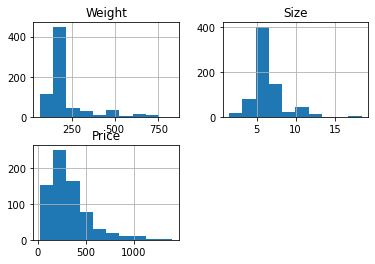

In [9]:
df.hist()

In [10]:
features_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in features_with_nan:
    print("Features with nan {} with {}% null values".format(feature,np.round(df[feature].isnull().mean()*100,2)))

Features with nan Weight with 1.52% null values
Features with nan Chipset with 9.41% null values
Features with nan GPU with 0.97% null values


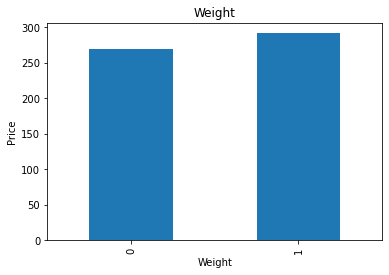

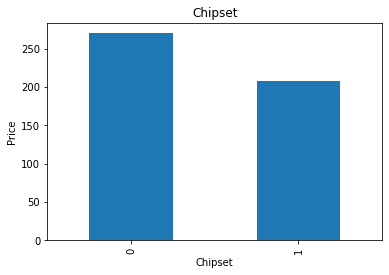

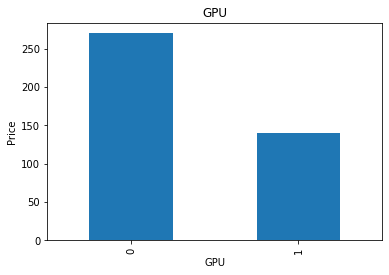

In [11]:
for feature in features_with_nan:
    if feature!='Price':
        data=df.copy()
        data[feature]=np.where(data[feature].isnull(),1,0)
        data.groupby(feature)['Price'].median().plot(kind='bar')
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show() 

In [12]:
df.isnull().sum()

Brand                0
Product              0
Technology           0
Announced            0
Status               0
Dimension            0
Weight              11
SIM                  0
USB                  0
Size                 0
Resolution           0
OS                   0
Chipset             68
CPU                  0
GPU                  7
Card_slot            0
Internal             0
Jack                 0
Bluetooth            0
GPS                  0
NFC                  0
Radio                0
Charging             0
Wlan                 0
Sensor               0
Price                0
Released_year        0
Internal_space       0
RAM                  0
horizontal_pixel     0
vertical_pixel       0
dtype: int64

In [13]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']

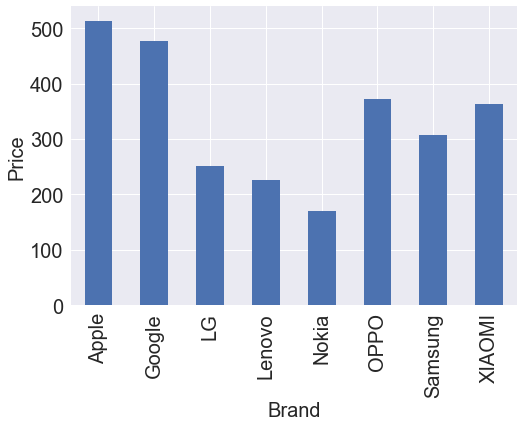

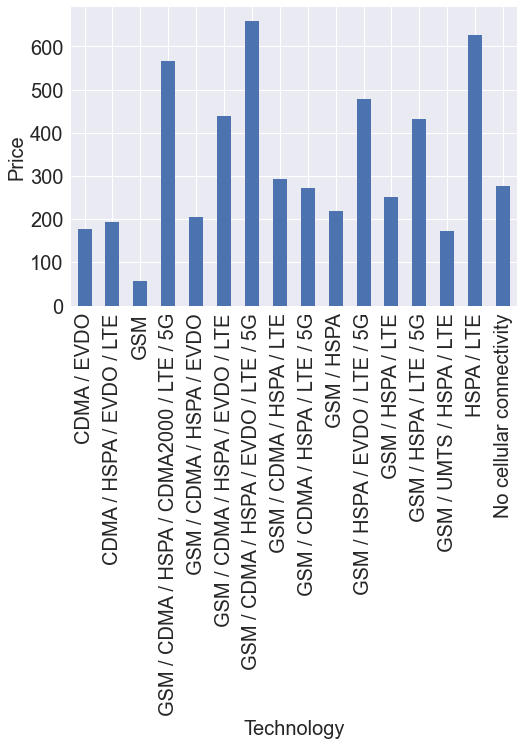

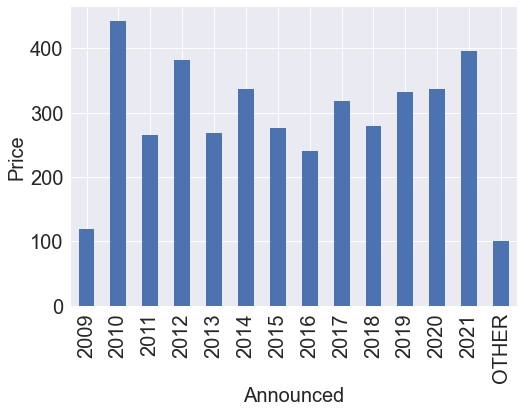

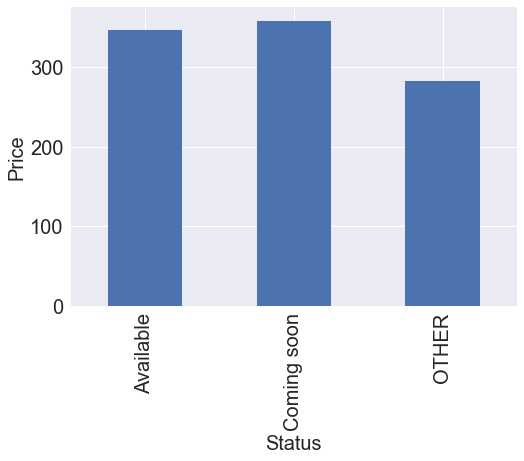

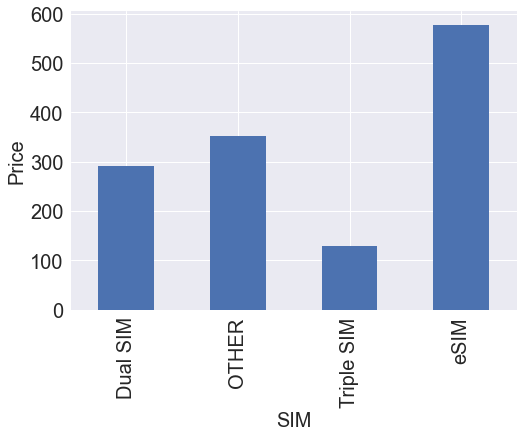

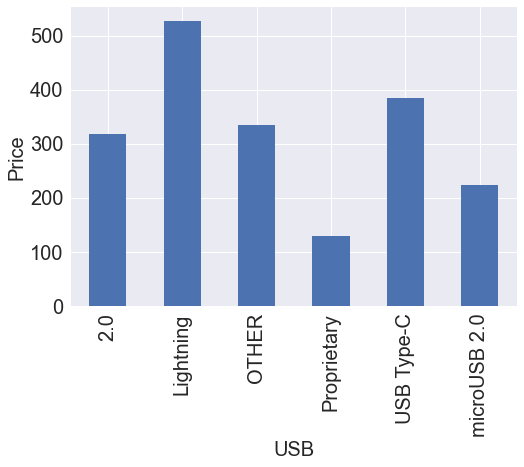

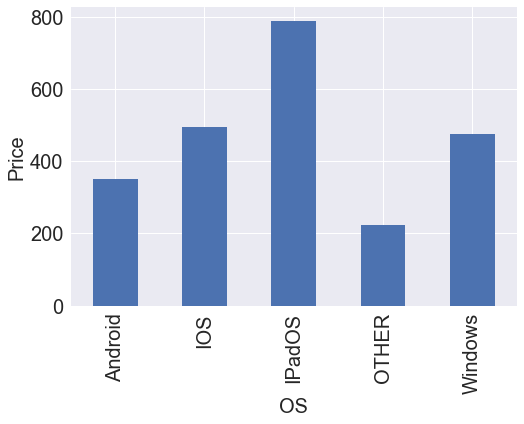

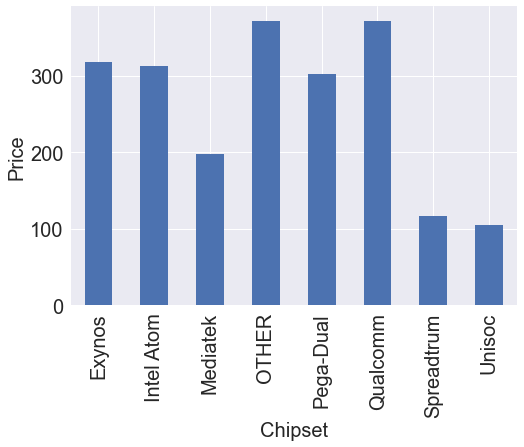

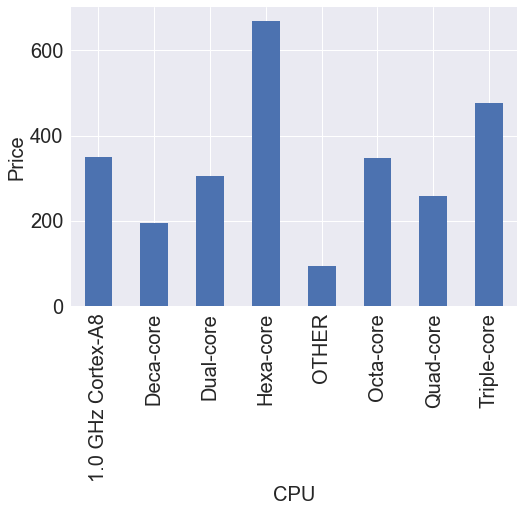

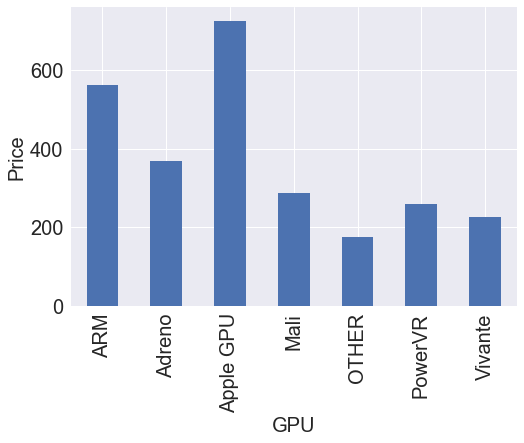

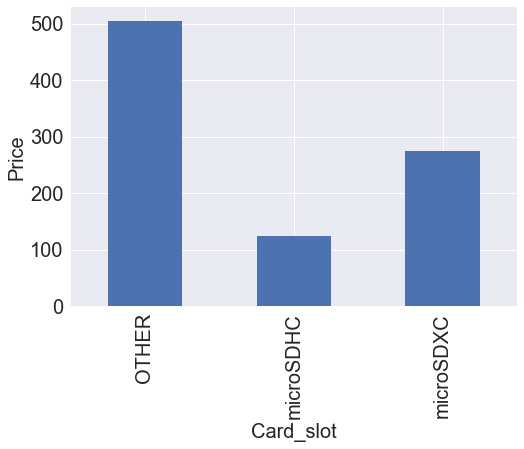

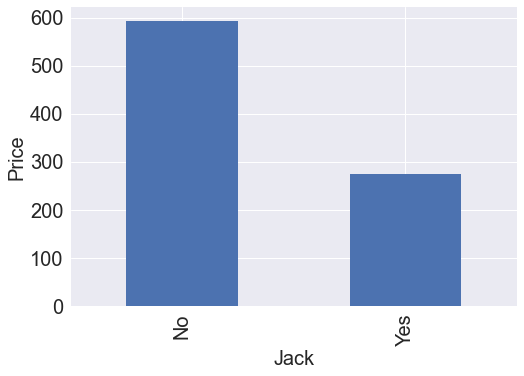

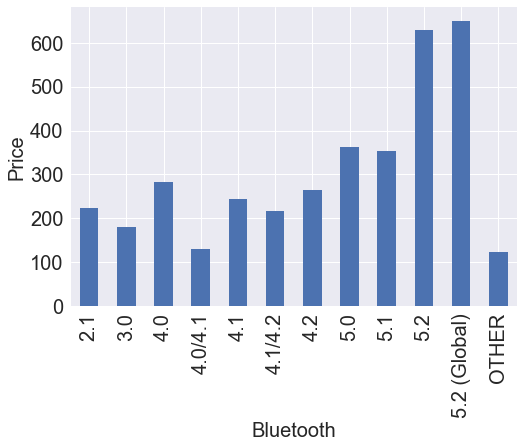

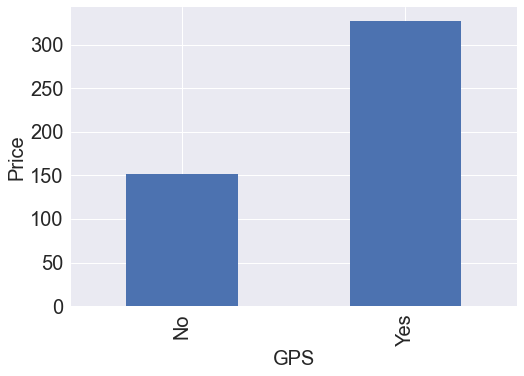

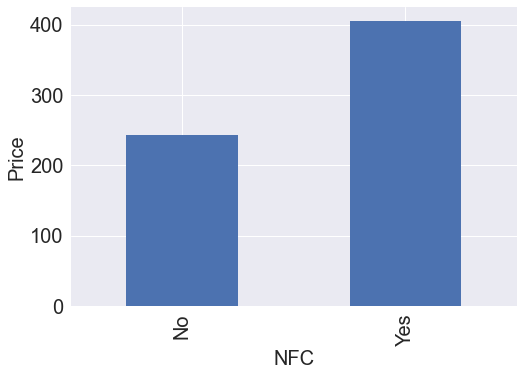

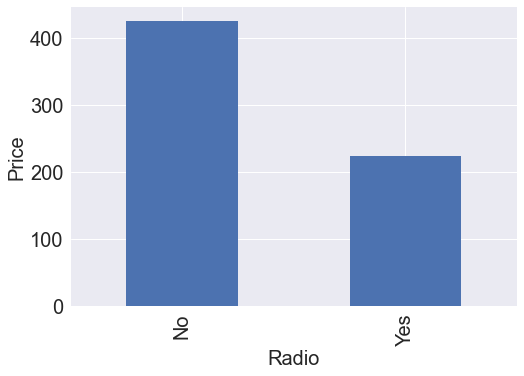

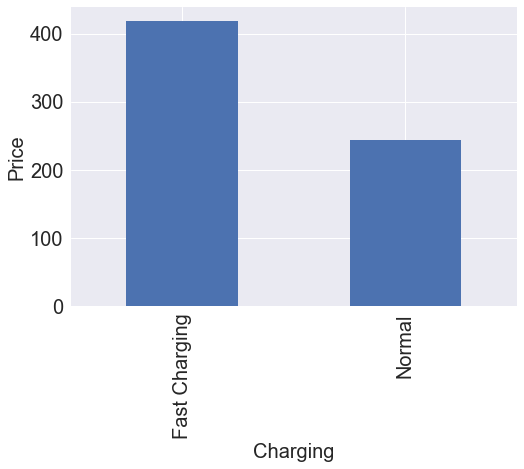

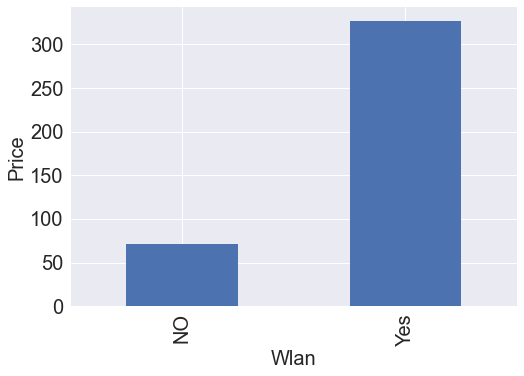

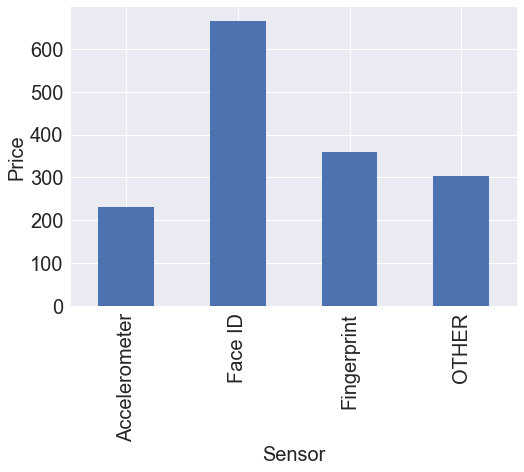

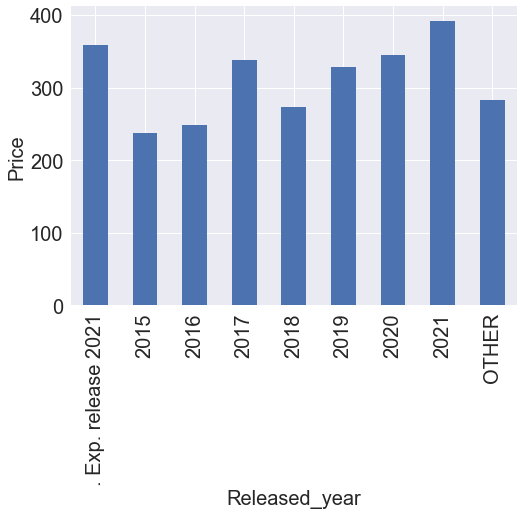

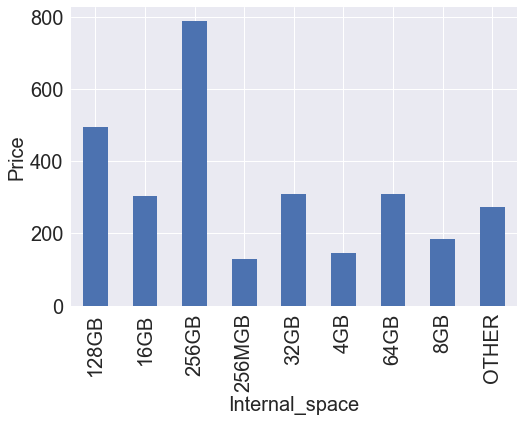

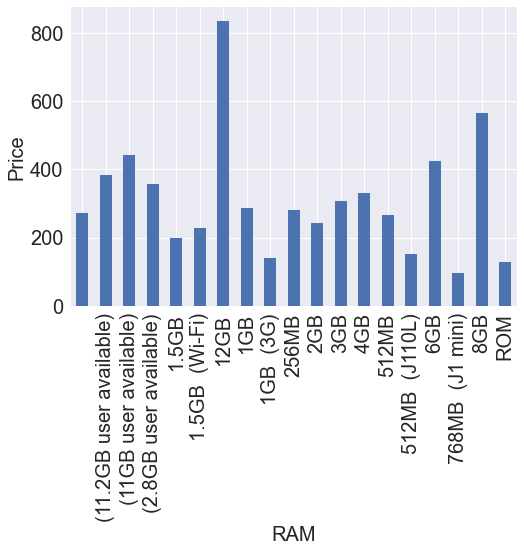

In [23]:
from matplotlib.pyplot import figure
import seaborn as sns
plt.style.use('seaborn')
my_colors = 'rgbkymc'
for feature in cat_feature:
    if feature not in ['Weight','Size']:
        if len(df[feature].unique())<20:
            #figure(figsize=(50, 28), dpi=180)
            plt.rc('xtick', labelsize=20) 
            plt.rc('ytick',labelsize=20)
            d=df.copy()
            d.groupby(feature)['Price'].mean().plot(kind='bar')
            plt.ylabel('Price',fontsize=20)
            plt.xlabel(feature,fontsize=20)
            plt.show()

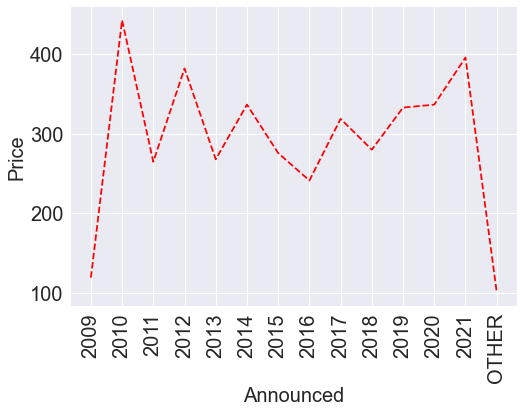

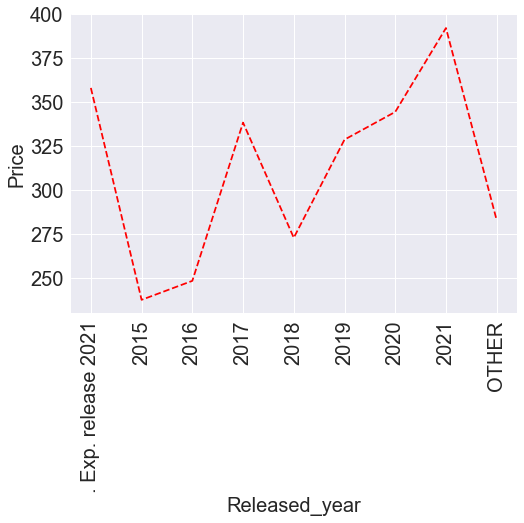

In [83]:
from matplotlib.pyplot import figure
import seaborn as sns
plt.style.use('seaborn')
my_colors = 'rgbkymc'
for feature in cat_feature:
    if feature in ['Announced','Released_year']:
        if len(df[feature].unique())<20:
            plt.rc('xtick', labelsize=20) 
            plt.rc('ytick',labelsize=20)
            d=df.copy()
            plt.plot(d.groupby(feature)['Price'].mean(),color='r',linestyle='--',label='Salary')
            plt.ylabel('Price',fontsize=20)
            plt.xlabel(feature,fontsize=20)
            plt.xticks(rotation=90)
            plt.show()

Brand
Apple      513.936774
Google     477.440625
LG         251.390408
Lenovo     226.186957
Nokia      169.868689
OPPO       372.360965
Samsung    308.146309
XIAOMI     363.093771
Name: Price, dtype: float64


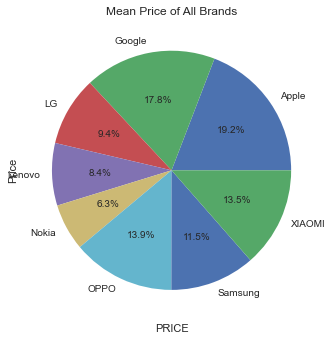

In [81]:
plt.style.use("seaborn")
print(df.groupby('Brand')['Price'].mean())
df.groupby('Brand')['Price'].mean().plot(kind='pie',autopct='%1.1f%%')
plt.title("Mean Price of All Brands")
plt.xlabel("PRICE",loc="center")
plt.show()

CPU                Product                        
1.0 GHz Cortex-A8  iPad Wi-Fi                          442.8000
                   iPad Wi-Fi + 3G                     442.8000
                   iPhone 4 CDMA                       162.0000
Deca-core          K8 Note                             194.4000
Dual-core          ATIV S Neo                          334.8000
                   Galaxy Ace 3                        140.4000
                   Galaxy Ace Style                    129.6000
                   Galaxy Core Advance                 205.2000
                   Galaxy Core Plus                    162.0000
                   Galaxy Express 2                    226.8000
                   Galaxy J1 Ace                       151.2000
                   Galaxy S Duos 2 S7582               140.4000
                   Galaxy S Duos 3                     108.0000
                   Galaxy S4 zoom                      302.4000
                   Galaxy Tab 3 10.1 P5200           

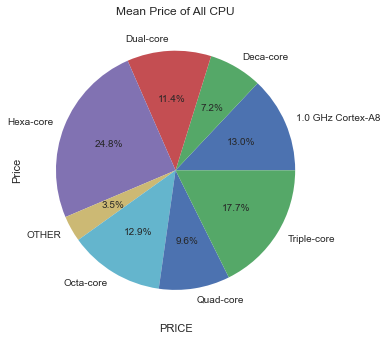

In [52]:
plt.style.use("seaborn")
print(df.groupby(['CPU','Product'])['Price'].mean())
df.groupby('CPU')['Price'].mean().plot(kind='pie',autopct='%1.1f%%')
plt.title("Mean Price of All CPU")
plt.xlabel("PRICE")
plt.show()